In [967]:
##  Ml Programming Assignments 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Datasets
Penguin_dataset=pd.read_csv("D:\ML\datasets\penguins.csv")
Wine_Quality_dataset=pd.read_csv("D:\ML\datasets\winequality-red.csv")


## Linear Regression:

In [968]:
# Data Preprocesing
Wine_Quality_dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [969]:
Wine_Quality_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [970]:
Wine_Quality_dataset.isnull().sum(axis=0)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [971]:
print(Wine_Quality_dataset.duplicated().sum())
Wine_Quality_dataset.drop_duplicates(inplace=True)
Wine_Quality_dataset=Wine_Quality_dataset.reset_index(drop=True)

240


In [972]:
Wine_Quality_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [973]:
#quality is a categorical column
Wine_Quality_dataset.drop(columns='quality',inplace=True)
corr_df=Wine_Quality_dataset.corr()
corr_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621


<Figure size 3000x1500 with 0 Axes>

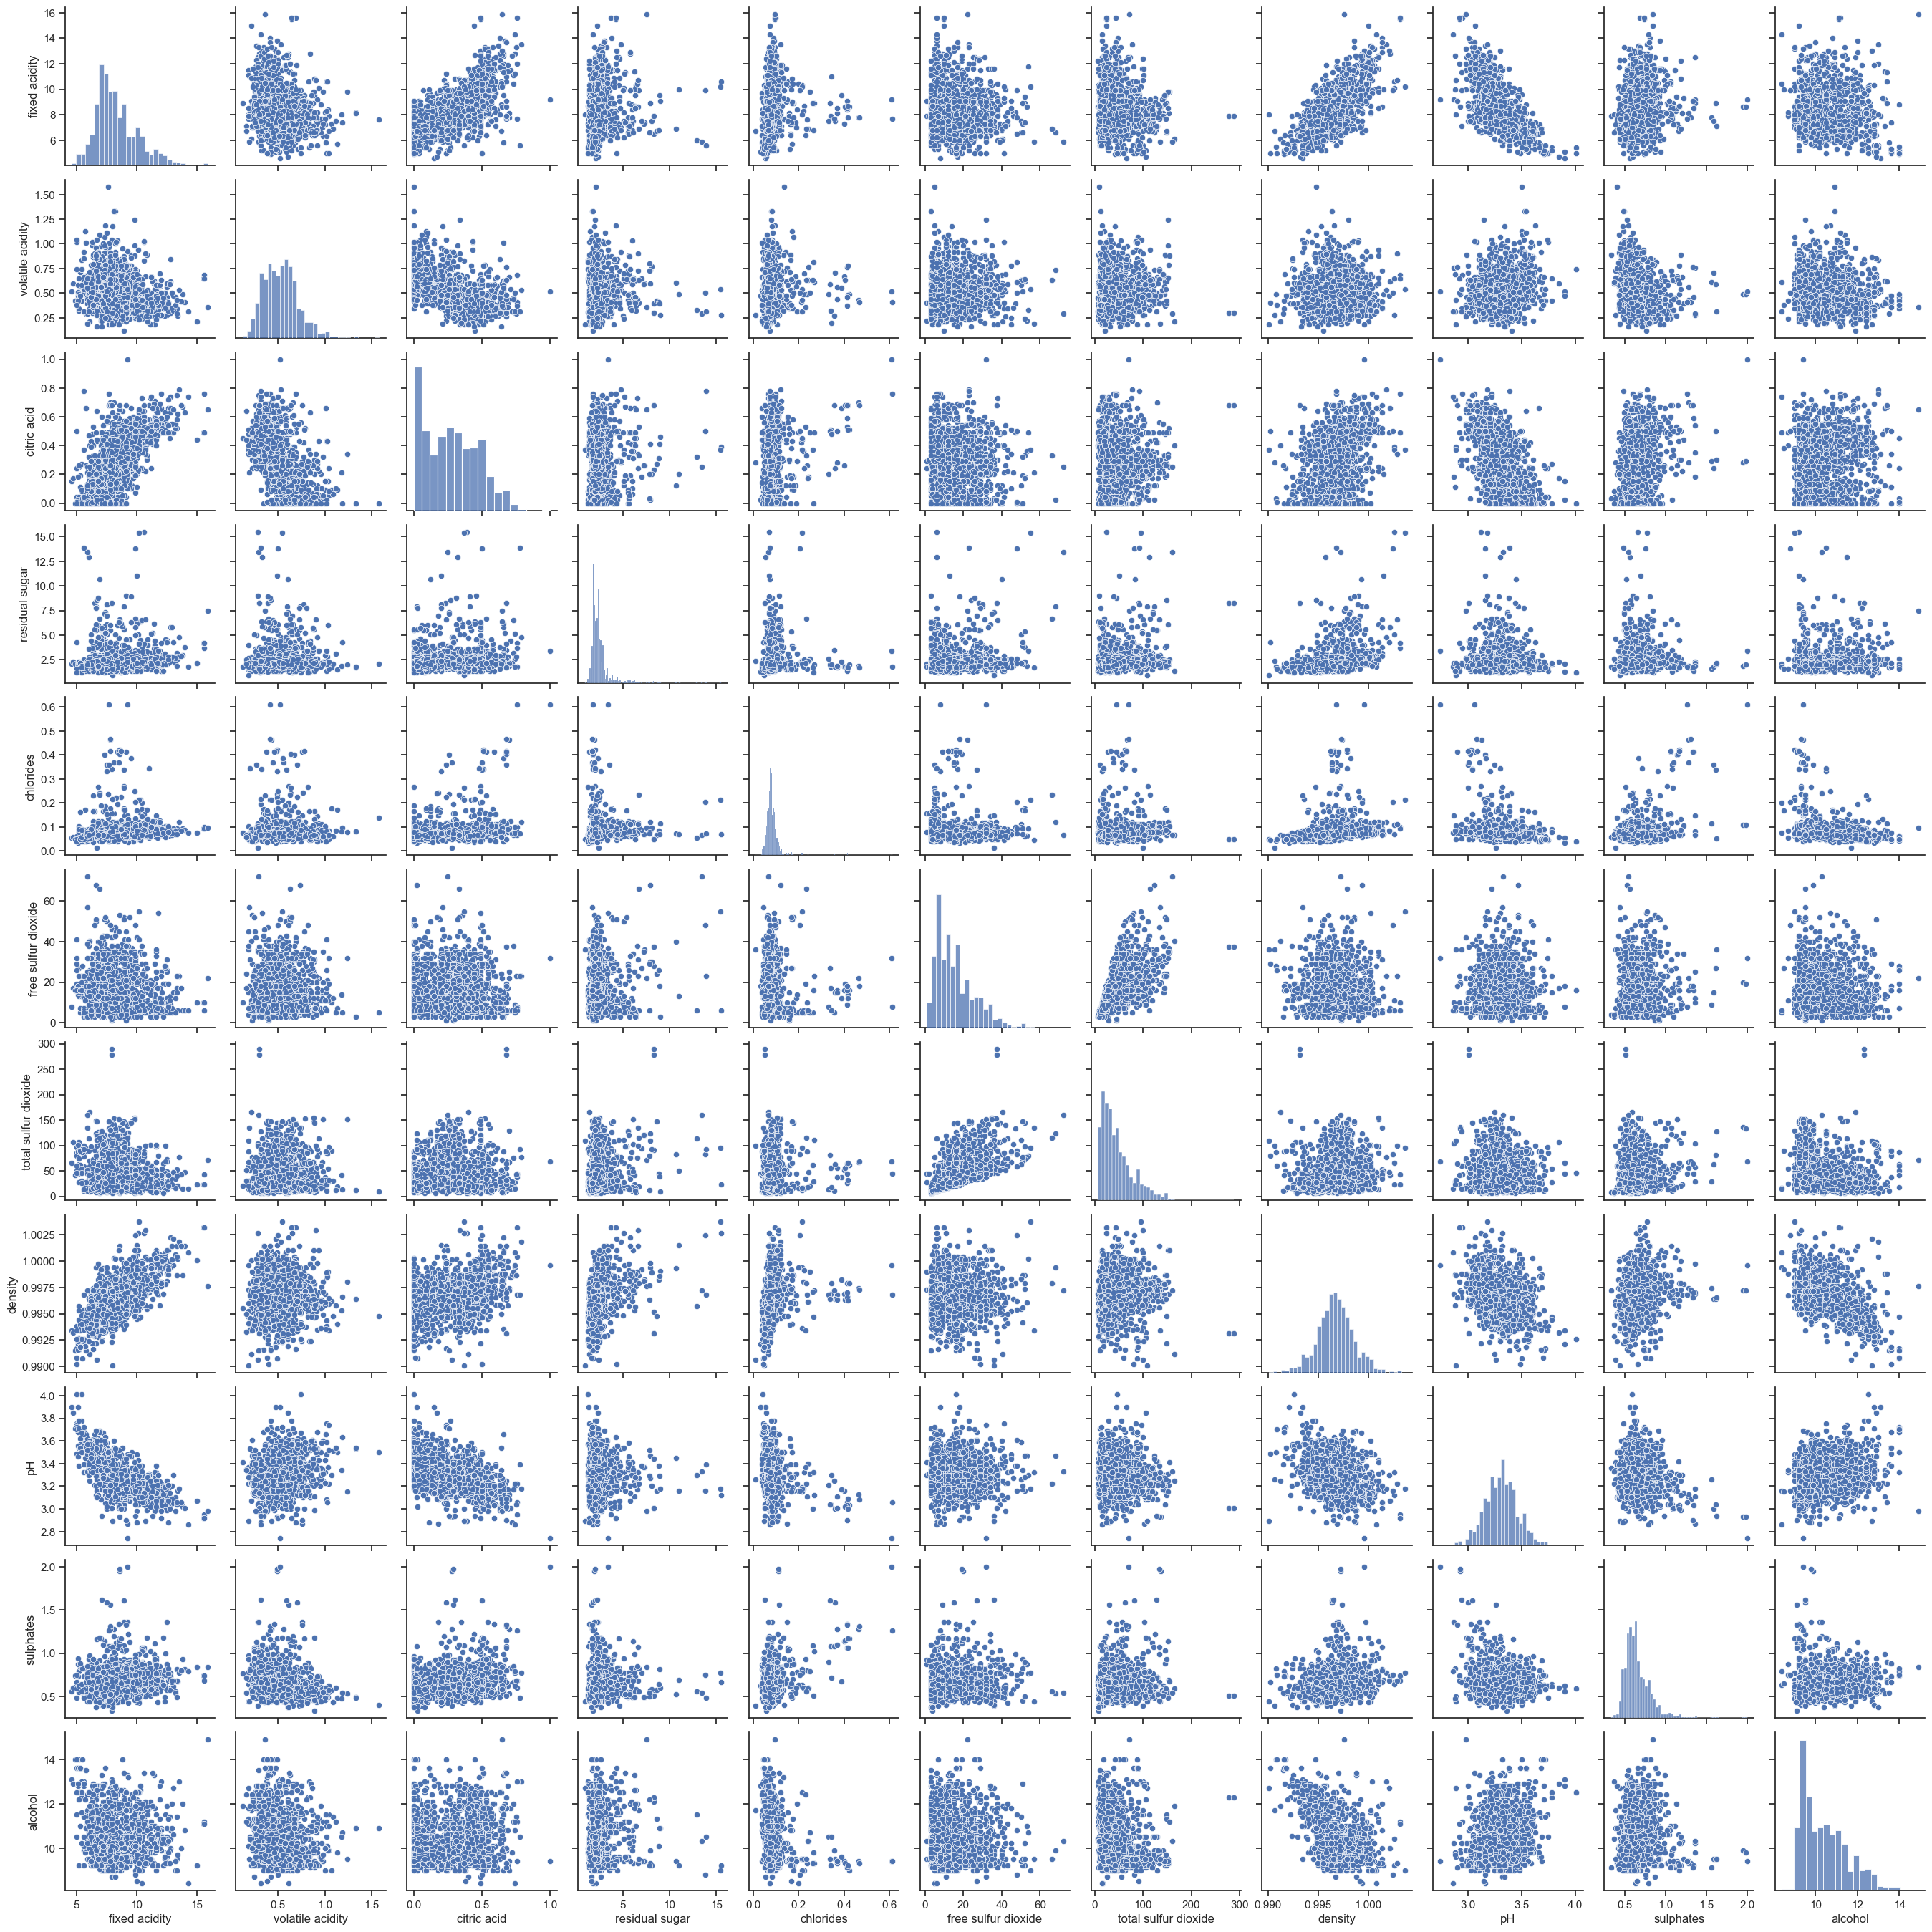

In [693]:
plt.figure(figsize=(30, 15))
sns.set(style="ticks")
sns.pairplot(data=Wine_Quality_dataset)
plt.show()

<IPython.core.display.Javascript object>


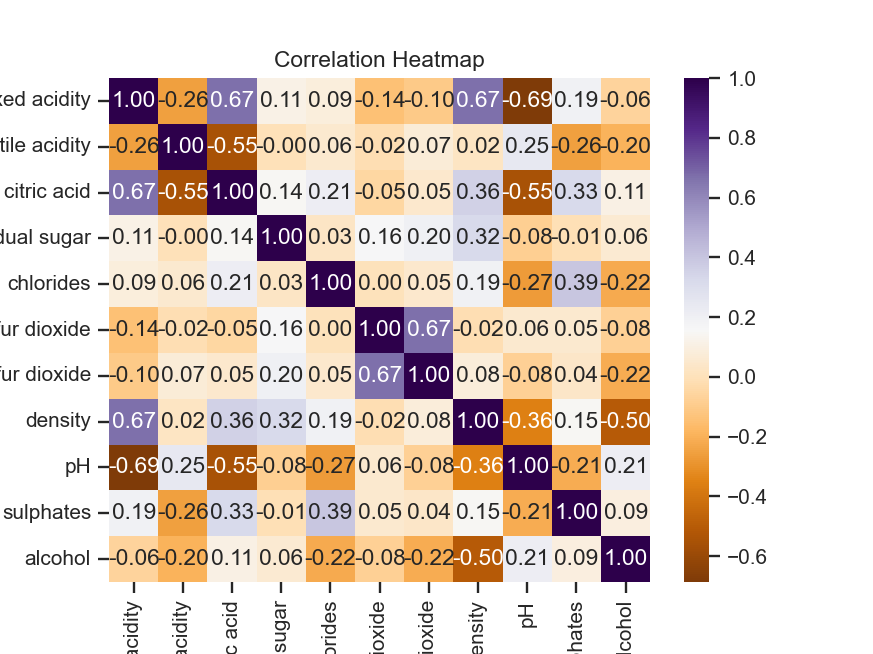

In [703]:
# plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='PuOr', fmt=".2f") 
plt.title('Correlation Heatmap')
plt.show()
plt.savefig("heat_map.png")

In [974]:
# correlation matrix:
# I choose density as target variable
print(abs(corr_df['density']).sort_values(ascending=False))
Y=Wine_Quality_dataset['density']
X=Wine_Quality_dataset.drop(columns=['density'])
# X=Wine_Quality_dataset[['volatile acidity','fixed acidity','alcohol','chlorides','sulphates']]
# X=Wine_Quality_dataset.drop(columns=['total sulfur dioxide','free sulfur dioxide','volatile acidity','sulphates','density'])
## Bias term needed or not?
X['bias']=np.ones(Wine_Quality_dataset.shape[0])

density                 1.000000
fixed acidity           0.670195
alcohol                 0.504995
citric acid             0.357962
pH                      0.355617
residual sugar          0.324522
chlorides               0.193592
sulphates               0.146036
total sulfur dioxide    0.078141
volatile acidity        0.023943
free sulfur dioxide     0.018071
Name: density, dtype: float64


In [975]:
# Data split to test and train
np.random.seed(108)
A=np.random.permutation(len(X))
train_split=A[0:(int(len(X)*0.8))]
test_split=A[(int(len(X)*0.8)):]
X_train=np.array(X.iloc[train_split])
X_test=np.array(X.iloc[test_split])
Y_train=np.array(Y.iloc[train_split])
Y_test=np.array(Y.iloc[test_split])
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1087, 11) (272, 11) (1087,) (272,)


In [976]:
## closed form solution of linear regression
coeff=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train),X_train)),np.transpose(X_train)),Y_train)
Y_predicted=np.dot(X_test,coeff)

## calculation MSE and loss function values
MSE=(((Y_test-Y_predicted)**2).sum())/len(Y_test)
print(f'The mean square error is {MSE}')
loss_value=(np.dot(np.transpose(Y_train-(np.dot(X_train,coeff))),(Y_train-(np.dot(X_train,coeff)))))/len(Y_train)
print(f'The loss value for training data {loss_value}')
print(f'The final weight vector with dimentions {coeff.shape} w={coeff}')


The mean square error is 5.310236551723634e-07
The loss value for training data 5.630385149879567e-07
The final weight vector with dimentions (11,) w=[ 9.55338429e-04  5.33561528e-04 -1.77629239e-04  4.09651661e-04
  2.49048867e-03 -8.74179986e-06  2.60938855e-06  5.04017850e-03
  1.35891449e-03 -9.23062757e-04  9.79346897e-01]


In [276]:
# including bias -0.00784238032349143 ,without bias-0.01125935214006565, with feature reduction:2.40642089395594e-25
# fd b:2.721290932074301e-19

In [978]:
%matplotlib notebook
# %matplotlib inline


<IPython.core.display.Javascript object>


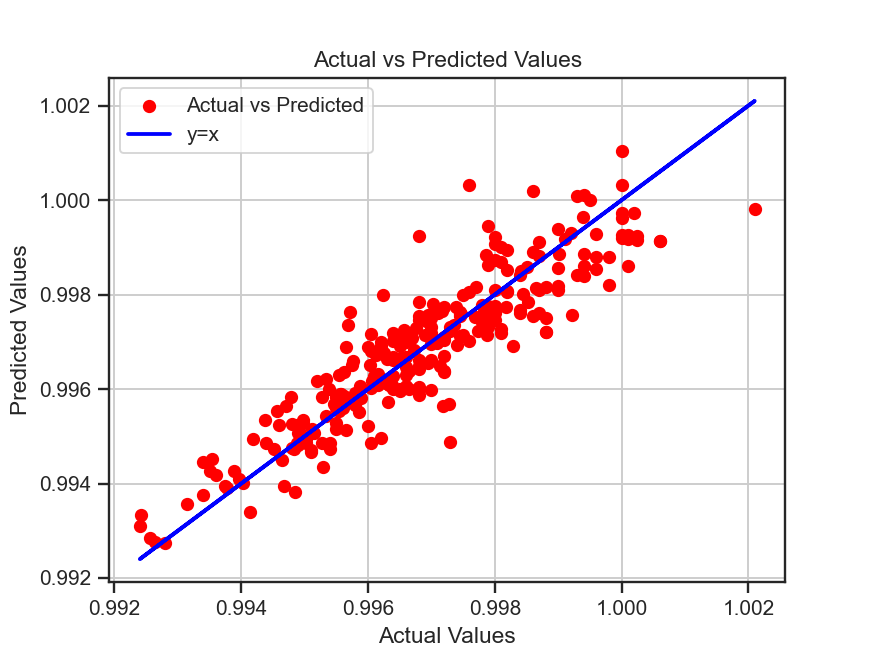

In [979]:
# plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_predicted, color='red', label='Actual vs Predicted')
plt.plot(Y_test, Y_test, color='blue', linestyle='-', linewidth=2, label='y=x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig("prob3.png", dpi=300, format='png')

## Logestic Regression


In [980]:
## Data Preprocessing
Penguin_dataset=pd.read_csv("D:\ML\datasets\penguins.csv")
Penguin_dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [981]:
print(Penguin_dataset.duplicated().sum())
Penguin_dataset

0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [982]:
print(Penguin_dataset.isnull().sum(axis=0))
Penguin_dataset.dropna(inplace=True)
Penguin_dataset=Penguin_dataset.reset_index(drop=True)
Penguin_dataset.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [983]:
print(Penguin_dataset.dtypes)
Penguin_dataset[['species','island','sex']]=Penguin_dataset[['species','island','sex']].astype('category')
Penguin_dataset.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [984]:
Penguin_dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [985]:
Penguin_dataset['species']=Penguin_dataset['species'].cat.codes
Penguin_dataset['island']=Penguin_dataset['island'].cat.codes
Penguin_dataset['sex']=Penguin_dataset['sex'].cat.codes

# Penguin_dataset['Year']=Penguin_dataset['Year'].cat.codes

In [986]:
Penguin_dataset.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964,0.004727
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435,-0.042111
bill_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078,0.032657
bill_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673,-0.048182
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169,0.151068
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987,0.021862
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000,-0.000467
year,0.004727,-0.042111,0.032657,-0.048182,0.151068,0.021862,-0.000467,1.000000


<IPython.core.display.Javascript object>


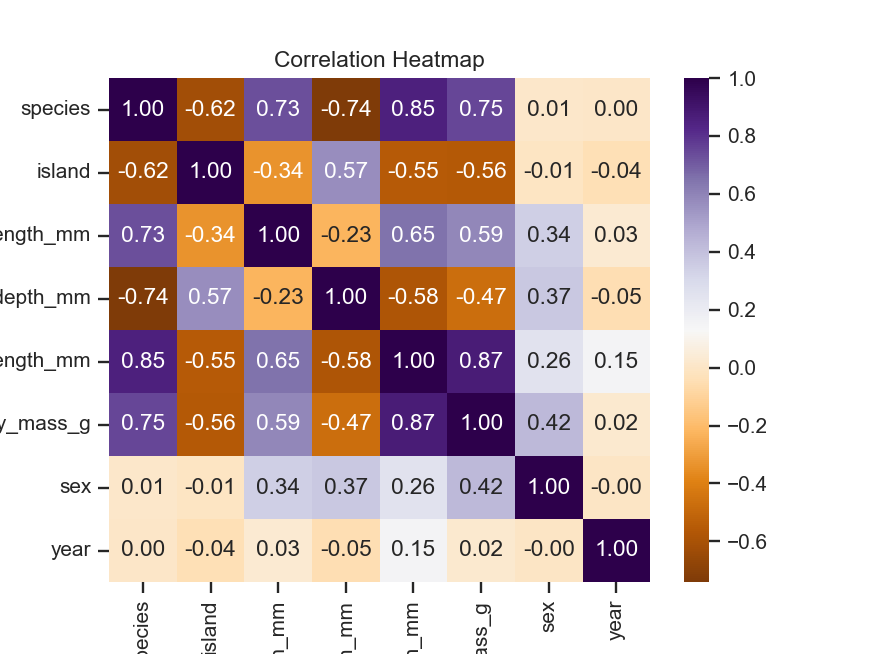

In [987]:
sns.heatmap(Penguin_dataset.corr(), annot=True, cmap='PuOr', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
plt.savefig("heat_map2.png")

In [988]:
Penguin_dataset['year']=Penguin_dataset['year'].astype('category')
def normalize(col):
    col_max=col.max()
    col_min=col.min()
    res=[]
    for ele in col:
            res.append((ele- col_min)/(col_max - col_min))
    return(pd.Series(res))
Penguin_dataset[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]=Penguin_dataset[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].apply(normalize,axis=0)


In [989]:
X_p=Penguin_dataset[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
# X_p=Penguin_dataset
# X_p=X_p.drop(columns=['sex'])
Y_p=Penguin_dataset['sex']
X_p.insert(0,'bias',np.ones(Penguin_dataset.shape[0]))
np.random.seed(108)
A=np.random.permutation(len(X_p))
train_split=A[0:(int(len(X_p)*0.8))]
test_split=A[(int(len(X_p)*0.8)):]
Xp_train=np.array(X_p.iloc[train_split])
Xp_test=np.array(X_p.iloc[test_split])
Yp_train=np.array(Y_p.iloc[train_split])
Yp_test=np.array(Y_p.iloc[test_split])
print(Xp_train.shape,Xp_test.shape,Yp_train.shape,Yp_test.shape)


(266, 5) (67, 5) (266,) (67,)


In [990]:
class LogitRegression():
    def __init__(self,rate,iterations):
        self.rate=rate
        self.iterations=iterations
        self.loss=[]
        self.acc=[]
        
    def fit(self,fea,target):
        self.w=np.random.uniform(0,1,fea.shape[1])
        for ele in range(self.iterations):
            y_predicted=self.sigmoid(np.dot(fea,self.w))
            grad=self.gradient_descent(fea,target,y_predicted)
            self.w=self.w - (self.rate*grad)
            l=self.cost(y_predicted,target)
            self.loss.append(l)
            self.acc.append((target==self.predict(fea)).sum()/len(target))
        
        
    def sigmoid(self,z):
        return(1/(1+(np.exp(-1*z))))
    
    def cost(self,y_p,y):
        return(-(y * np.log(y_p) + (1 - y) * np.log(1 - y_p))).mean()
    
    def gradient_descent(self,x,y,y_p):
        return(np.dot(np.transpose(x),(y_p - y)))/len(y)
        
    
    def predict(self,x):
        y_pred=self.sigmoid(np.dot(x,self.w))
        return (y_pred >= 0.5).astype(int)



Accuracy is 49.25
the weight vectors are [0.47373123 0.98698434 0.52470098 0.65751613] and bias b=-0.013026550338823654


<IPython.core.display.Javascript object>


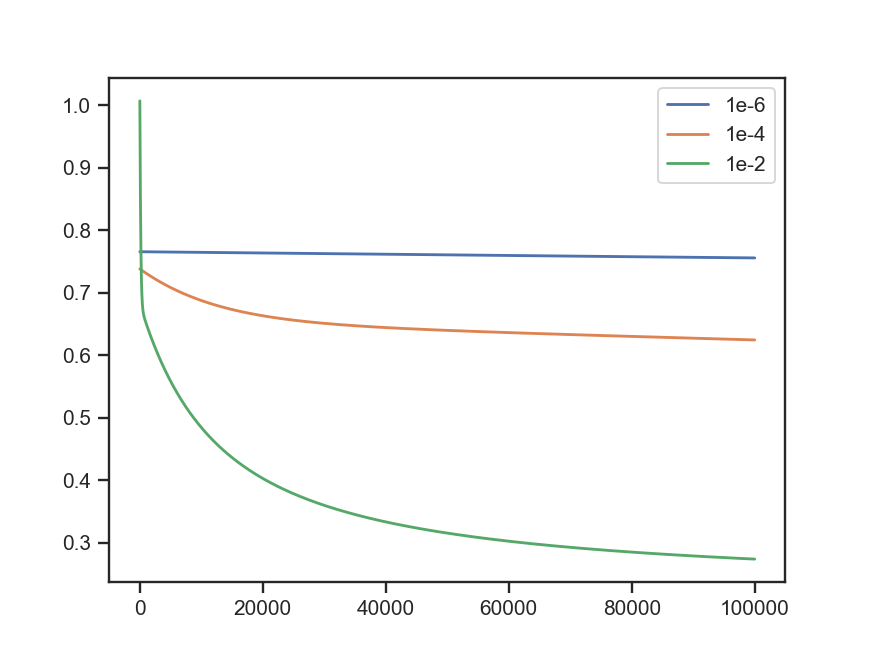

In [952]:
model=LogitRegression(1e-6,100000)

model.fit(Xp_train,Yp_train)
loss_values=model.loss
predicted_values=model.predict(Xp_test)
print("Accuracy is",round(100*((Yp_test == predicted_values).sum()/len(Yp_test)),2))
# plt.plot(model.accuracies)
print(f'the weight vectors are {model.w[1:]} and bias b={model.w[0]}')
plt.plot(model.loss,label='1e-6')
plt.legend()
plt.show()

In [953]:
model=LogitRegression(1e-4,100000)

model.fit(Xp_train,Yp_train)
loss_values=model.loss
predicted_values=model.predict(Xp_test)
print("Accuracy is",round(100*((Yp_test == predicted_values).sum()/len(Yp_test)),2))
# plt.plot(model.accuracies)
print(f'the weight vectors are {model.w[1:]} and bias b={model.w[0]}')
plt.plot(model.loss,label='1e-4')
plt.legend()
plt.show()

Accuracy is 67.16
the weight vectors are [0.2236711  0.86313075 0.47512733 0.34877579] and bias b=-0.7152063547695224


Accuracy is 89.55
the weight vectors are [2.26862805 9.63004986 0.14727384 9.50990358] and bias b=-9.606363884244237


<IPython.core.display.Javascript object>


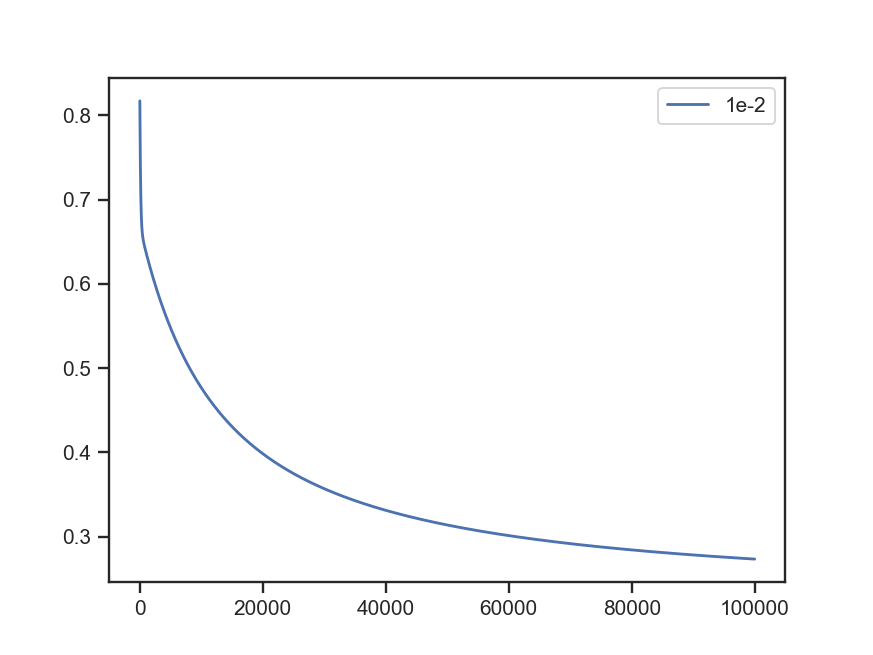

In [991]:
model=LogitRegression(1e-2,100000)

model.fit(Xp_train,Yp_train)
loss_values=model.loss
predicted_values=model.predict(Xp_test)
print("Accuracy is",round(100*((Yp_test == predicted_values).sum()/len(Yp_test)),2))
# plt.plot(model.accuracies)
print(f'the weight vectors are {model.w[1:]} and bias b={model.w[0]}')
plt.plot(model.loss,label='1e-2')
plt.legend()
plt.show()

In [965]:
model=LogitRegression(1e-2,10000)

model.fit(Xp_train,Yp_train)
loss_values=model.loss
predicted_values=model.predict(Xp_test)
print("Accuracy is",round(100*((Yp_test == predicted_values).sum()/len(Yp_test)),2))
# plt.plot(model.accuracies)
print(f'the weight vectors are {model.w[1:]} and bias b={model.w[0]}')
plt.plot(model.loss,label='1e-2')
plt.legend()
plt.show()

Accuracy is 89.55
the weight vectors are [1.36942461 2.77573025 0.43694788 2.46813435] and bias b=-3.0672563221714406


In [958]:
model=LogitRegression(1e-2,1000)

model.fit(Xp_train,Yp_train)
loss_values=model.loss
predicted_values=model.predict(Xp_test)
print("Accuracy is",round(100*((Yp_test == predicted_values).sum()/len(Yp_test)),2))
# plt.plot(model.accuracies)
print(f'the weight vectors are {model.w[1:]} and bias b={model.w[0]}')


Accuracy is 59.7
the weight vectors are [0.21118741 0.54683277 0.02293505 0.54712865] and bias b=-0.4062927711607101


In [959]:
model=LogitRegression(1e-2,1000)

model.fit(Xp_train,Yp_train)
loss_values=model.loss
predicted_values=model.predict(Xp_test)
print("Accuracy is",round(100*((Yp_test == predicted_values).sum()/len(Yp_test)),2))
# plt.plot(model.accuracies)
print(f'the weight vectors are {model.w[1:]} and bias b={model.w[0]}')


Accuracy is 62.69
the weight vectors are [0.1816378  0.60512923 0.37306885 0.64149452] and bias b=-0.6376531334020807


In [961]:
#BEST Accuary and respective weight and loss graph
model=LogitRegression(1e-2,10000)

model.fit(Xp_train,Yp_train)
loss_values=model.loss
predicted_values=model.predict(Xp_test)
print("Accuracy is",round(100*((Yp_test == predicted_values).sum()/len(Yp_test)),2))
print(f'the weight vectors are {model.w[1:]} and bias b={model.w[0]}')

Accuracy is 89.55
the weight vectors are [ 1.46920815  2.42639183 -0.0851576   2.63125472] and bias b=-2.753177556004413


<IPython.core.display.Javascript object>


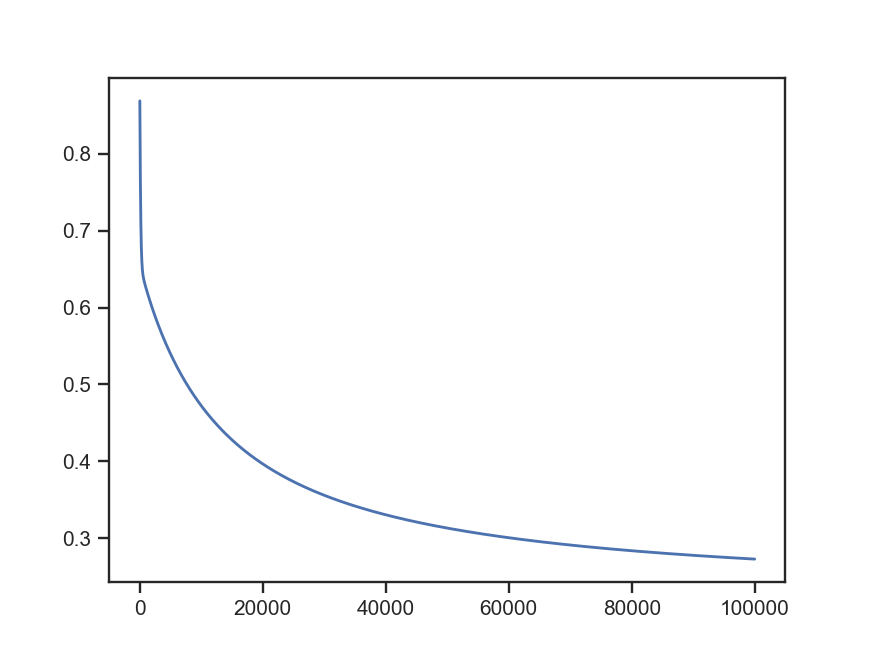

In [905]:
plt.plot(model.loss)
plt.show()